In [27]:
# Treinando e visualizando uma arvore de decisao
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # comprimento e largura da petala
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [28]:
# visualizando a arvore
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

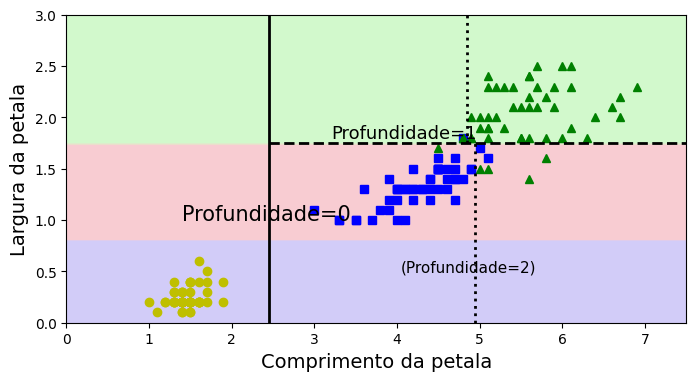

In [29]:
# Fazendo predicoes
# Equaçaõ de gini para calcular a impureza de um no
# gini = 1 - (p0)^2 - (p1)^2 - (p2)^2
# p0, p1 e p2 sao as proporcoes de cada classe no nó em questao (ex: 0.2, 0.5, 0.3)

# A funcao de custo do algoritmo CART é a seguinte:
# J(k, t_k) = m_esq / m * g_esq + m_dir / m * g_dir
# onde:
# k é o indice do atributo
# t_k é o valor de corte do atributo k
# m_esq e m_dir sao o numero de instancias no no esquerdo e direito, respectivamente
# g_esq e g_dir sao as impurezas dos nos esquerdo e direito, respectivamente

# O algoritmo CART é um algoritmo guloso, ou seja, ele busca a melhor solucao no momento atual
# sem se preocupar com o futuro. Ele nao garante a melhor solucao global, mas geralmente funciona bem na pratica.

# grafico de fronteiras de decisao da arvore de decisao
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    # gerando os pontos para predizer
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)

    # criando uma matriz de pontos
    x1, x2 = np.meshgrid(x1s, x2s)

    # predizendo os pontos
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    # plotando as fronteiras de decisao
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.brg, alpha=0.2)

    # plotando os dados de treinamento
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)

    # plotando a legenda
    if iris:
        plt.xlabel("Comprimento da petala", fontsize=14)
        plt.ylabel("Largura da petala", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    if legend:
        plt.legend(loc="lower right", fontsize=14)
    
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Profundidade=0", fontsize=15)
plt.text(3.2, 1.80, "Profundidade=1", fontsize=13)
plt.text(4.05, 0.5, "(Profundidade=2)", fontsize=11)

plt.show()

In [30]:
# estimando a probabilidade de uma instancia pertencer a uma classe
print(tree_clf.predict_proba([[5, 1.5]])) 


[[0.         0.90740741 0.09259259]]


In [31]:
tree_clf.predict([[5, 1.5]]) # predizendo a classe

array([1])

In [32]:
# Algorigtmo CART é NP-completo, ou seja, é um problema que nao pode ser resolvido de forma eficiente
# O algoritmo de treinamento do scikit-learn é uma versao estocastica do algoritmo CART
# O algoritmo de treinamento do scikit-learn nao consegue encontrar a melhor arvore de decisao,
# mas ele consegue encontrar uma arvore que é bem proxima da melhor solucao possivel para o problema em questao (solucao subotima)
# O algoritmo de treinamento do scikit-learn é capaz de encontrar a solucao subotima em um tempo razoavel, mesmo para conjuntos de dados grandes
# Alguns hiperparametros do algoritmo de treinamento do scikit-learn sao:
# - max_depth: profundidade maxima da arvore
# - min_samples_split: numero minimo de instancias que um no deve ter antes de ser dividido
# - min_samples_leaf: numero minimo de instancias que um no folha deve ter
# - min_weight_fraction_leaf: mesmo que min_samples_leaf, mas expresso como uma fracao do numero total de instancias
# - max_leaf_nodes: numero maximo de nos folha
# - max_features: numero maximo de atributos a serem considerados para dividir um no

In [33]:
# Complexidade computacional do algoritmo de treinamento do scikit-learn:
# - O(n * m * log(m)): para conjuntos de dados pequenos (menos de algumas milhares de instancias)
# - O(n * m^2): para conjuntos de dados maiores
# Onde:
# - n é o numero de instancias
# - m é o numero de atributos

# Coeficiente de impureza de Gini é mais rapido que a entropia, mas geralmente nao faz muita diferença
# A entropia tende a produzir arvores mais balanceadas, enquanto o coeficiente de impureza de Gini tende a produzir arvores mais desbalanceadas
# A entropia é uma medida de desordem, enquanto o coeficiente de impureza de Gini é uma medida de impureza
# Equacao da entropia: H_i = - somatorio(p_i * log2(p_i)), onde p_i é a proporcao da classe i no nó em questao.

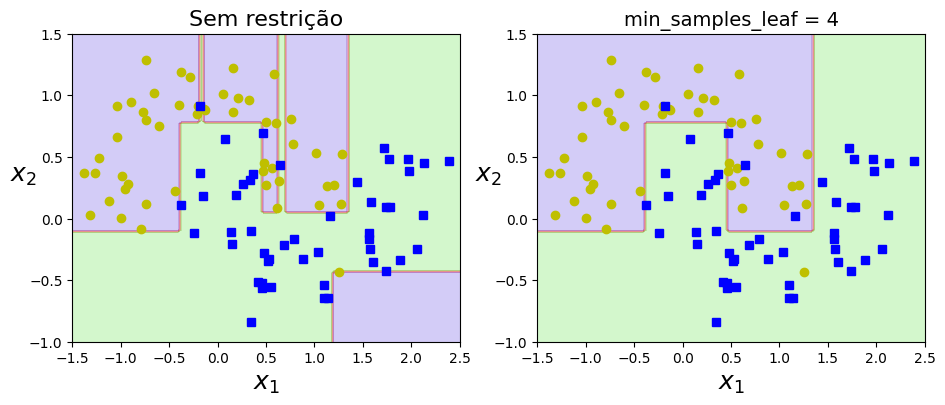

In [34]:
# Hiperparametros de regularizacao
# É uma boa pratica limitar a complexidade da arvore de decisao para evitar o overfitting
# Se deixarmos a arvore crescer sem limites, ela se adaptara demais ao conjunto de treinamento e nao generalizara bem para novos conjuntos de dados
# Por isso é importante limitar a profundidade da arvore, o numero minimo de instancias por no, o numero minimo de instancias por no folha, etc.
# Isso é chamado de regularizacao da arvore de decisao
# A regularizacao é controlada por hiperparametros do algoritmo de treinamento do scikit-learn (max_depth, min_samples_split, min_samples_leaf, etc.)

# Análise gráfica de duas arvores de decisao treinadas com diferentes hiperparametros no conjunto de dados moons.Um grafico 
# mostra sem restrição e o outro com o min_samples_leaf=4.
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)


deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("Sem restrição", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.show()



In [35]:
# O grafico da esquerda mostra a arvore de decisao treinada sem nenhuma restricao, e o grafico da direita mostra a arvore de decisao treinada com min_samples_leaf=4
# A arvore da esquerda é obviamente overfitting, e a arvore da direita parece mais equilibrada e provavelmente generalizara melhor.

In [38]:
# Regressão
# Arvores de decisao tambem podem ser usadas para tarefas de regressao
# Vamos treinar uma arvore de decisao para a tarefa de regressao

# gerando dados de regressao]

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

from sklearn.tree import DecisionTreeRegressor


tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [39]:
# visualizando a arvore
export_graphviz(
    tree_reg,
    out_file="iris_tree_reg.dot",
    feature_names= ["x1"],
    rounded=True,
    filled=True
)

# Codigo para ver a arvore de decisao:
# dot -Tpng iris_tree_reg.dot -o iris_tree_reg.png

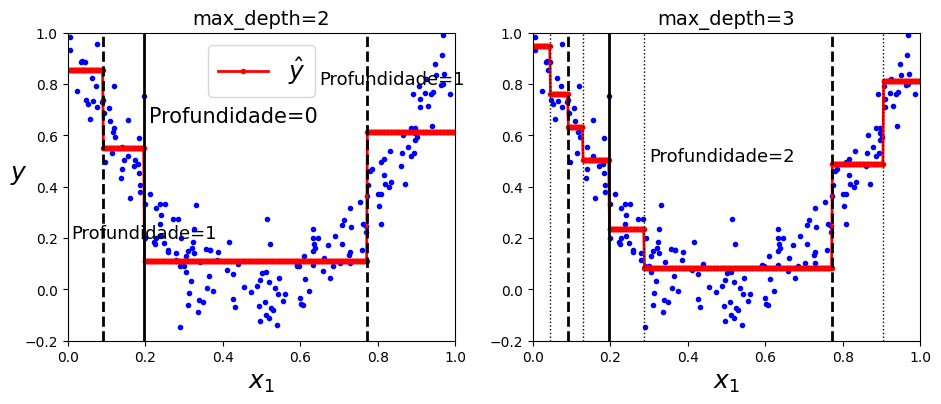

In [40]:
# predição de dois modelos de regressão treinados com diferentes hiperparametros
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Profundidade=0", fontsize=15)
plt.text(0.01, 0.2, "Profundidade=1", fontsize=13)
plt.text(0.65, 0.8, "Profundidade=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Profundidade=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

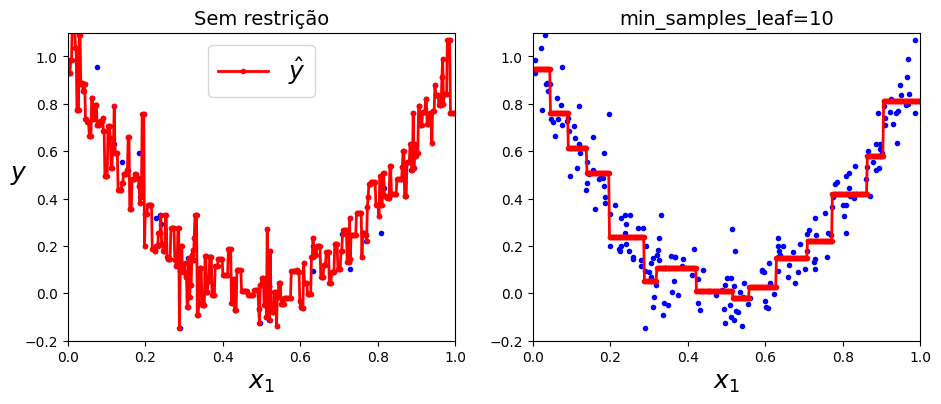

In [41]:
# Explicaçao do grafico:
# O grafico da esquerda mostra a previsao de um modelo de regressao treinado com max_depth=2, isso é, com duas regioes de previsao
# O grafico da direita mostra a previsao de um modelo de regressao treinado com max_depth=3, isso é, com tres regioes de previsao
# Note que a arvore de decisao da direita tem uma regiao a mais, e portanto, a previsao é mais complexa.
# Isso é importante para entender como as arvores de decisao funcionam e como elas se adaptam aos dados de treinamento.
# Se nao houver restricoes (max_depth, min_samples_leaf, etc.), a arvore de decisao se adaptara demais aos dados de treinamento e overfitting.
# Por exemplo, definir apenas um min_samples_leaf=10 ja pode limitar o overfitting.

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("Sem restrição", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

In [ ]:
# O grafico da esquerda mostra a previsao de um modelo de regressao treinado sem nenhuma restricao (ou seja, com min_samples_leaf=1)
# O grafico da direita mostra a previsao de um modelo de regressao treinado com min_samples_leaf=10
# Note que a arvore de decisao da direita parece muito mais equilibrada e provavelmente generalizara melhor.

In [ ]:
# Instabilidade
# As arvores de decisao sao muito sensíveis a pequenas variacoes nos dados de treinamento
# Se voce treinar uma arvore de decisao com um conjunto de treinamento um pouco diferente, voce obtera uma arvore completamente diferente, e isso é um problema
# Uma boa pratica é usar a media de previsoes de varias arvores de decisao treinadas em diferentes conjuntos de treinamento
# Isso é chamado de ensemble learning